# Pymaceuticals Inc.
---

### Analysis

- There is a strong correlation between mouse weight and average tumor volume.
- Capomulin had the second lowest mean and median for tumor volume, therefore it is a good treatment option. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on = ["Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [6]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head()

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
dtype: int64

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = merge_df.loc[merge_df["Mouse ID"]!= "g989"].reset_index(drop=True)
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

pd.DataFrame({"Mean": mean,
             "Medians": median,
             "Var": variance,
             "Std": std,
             "Sem": sem})

,Mean,Medians,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# https://git.bootcampcontent.com/Southern-Methodist-University/SMU-VIRT-DATA-PT-09-2023-U-LOLC/-/blob/main/02-Homework/05-Data-Visualization/Starter_Code/Pymaceuticals/pymaceuticals_starter-BOOOOOOTH.ipynb
df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

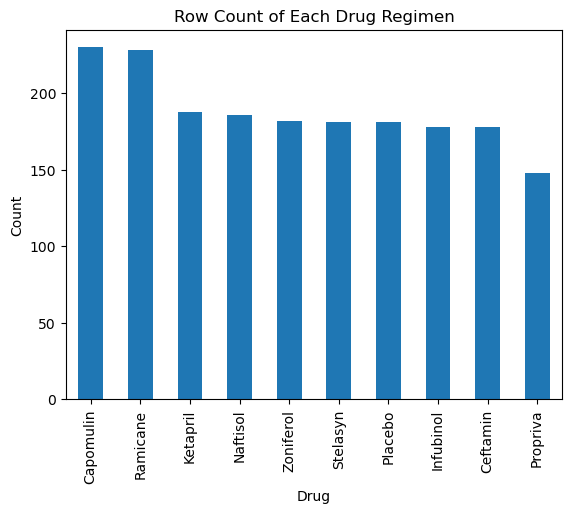

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_vals = df2["Drug Regimen"].value_counts()
drug_vals.plot(kind = "bar", xlabel = "Drug", ylabel = "Count", title = "Row Count of Each Drug Regimen")
plt.show()

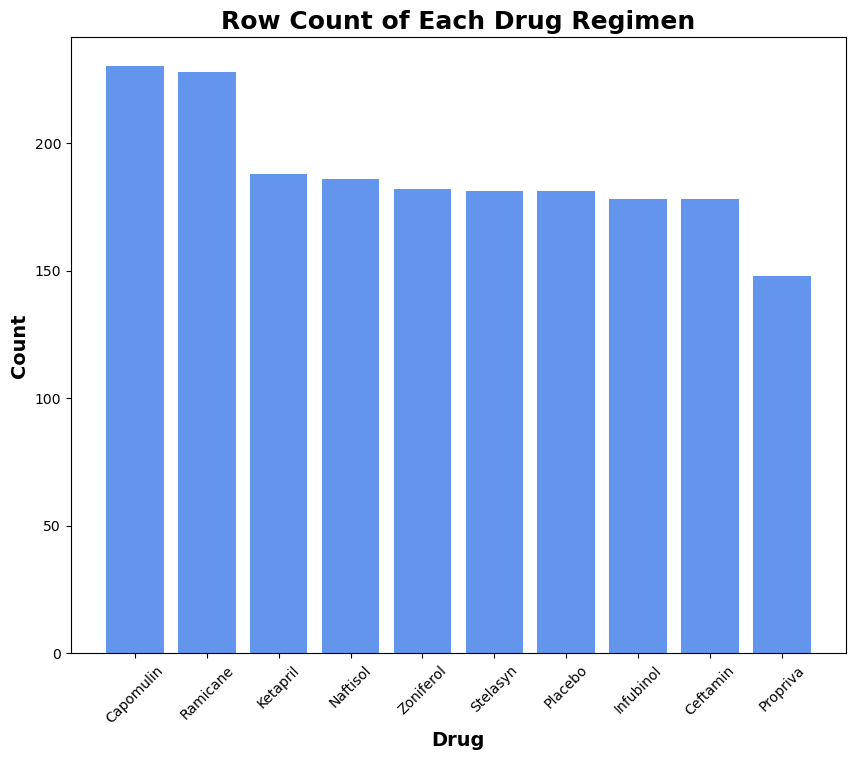

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_vals = df2["Drug Regimen"].value_counts()

plt.figure(figsize = (10, 8))
plt.bar(drug_vals.index, drug_vals.values, color = "cornflowerblue")
plt.xlabel("Drug", fontweight = "bold", fontsize = 14)
plt.ylabel("Count", fontweight = "bold", fontsize = 14)
plt.title("Row Count of Each Drug Regimen", fontweight = "bold", fontsize = 18)
plt.xticks(rotation=45)
plt.show()

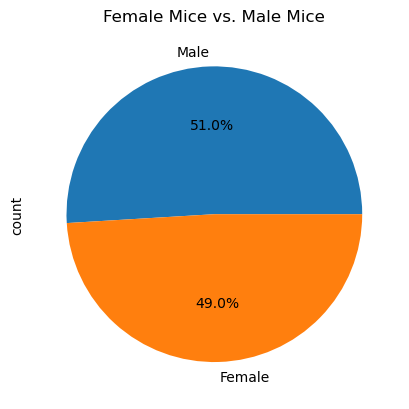

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_vals = df2["Sex"].value_counts()
sex_vals.plot(kind = "pie", title = "Female Mice vs. Male Mice", autopct="%1.1f%%")
plt.show()

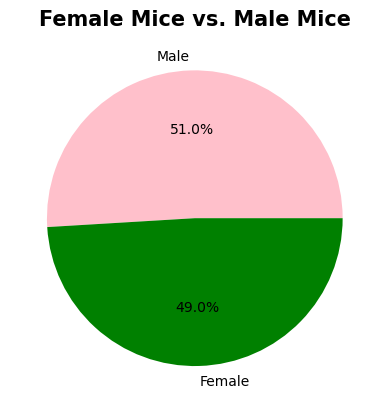

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_vals = df2["Sex"].value_counts()
plt.labels = "Male", "Female"
plt.pie(sex_vals, labels=sex_vals.index.values, autopct='%1.1f%%', colors=['pink', 'green'])
plt.title("Female Mice vs. Male Mice", fontweight = "bold", fontsize = 15)
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = df2.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = max_tumor.merge(df2,on=['Mouse ID','Timepoint'],how="left")
df3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_lists = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sub = df3.loc[df3["Drug Regimen"] == drug]
    
    # add subset 
    tumor = sub["Tumor Volume (mm3)"]
    tumor_lists.append(tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(f" The potential outliers of {drug} are {outliers}.")

 The potential outliers of Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64).
 The potential outliers of Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64).
 The potential outliers of Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
 The potential outliers of Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64).


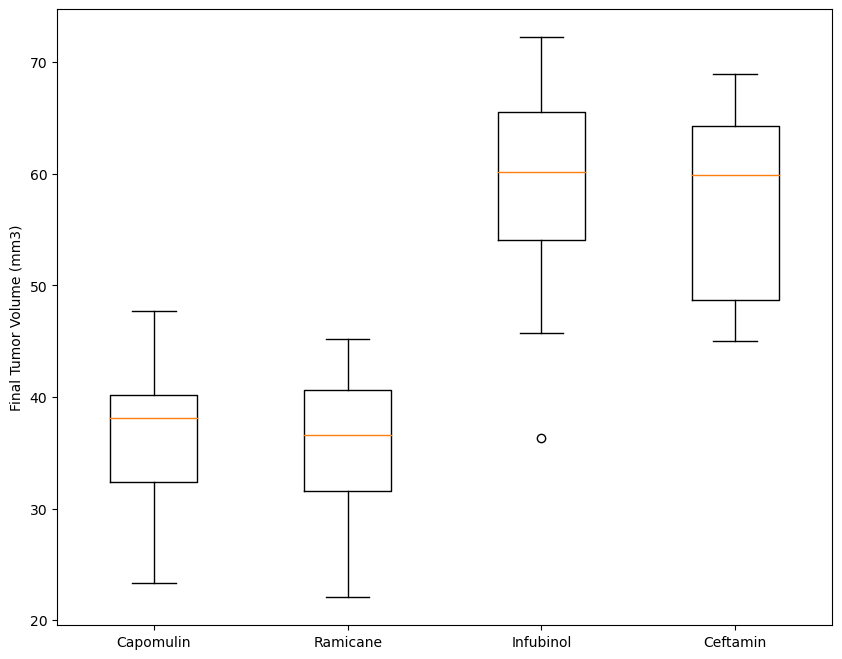

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 8))
plt.boxplot(tumor_lists, labels=drugs)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

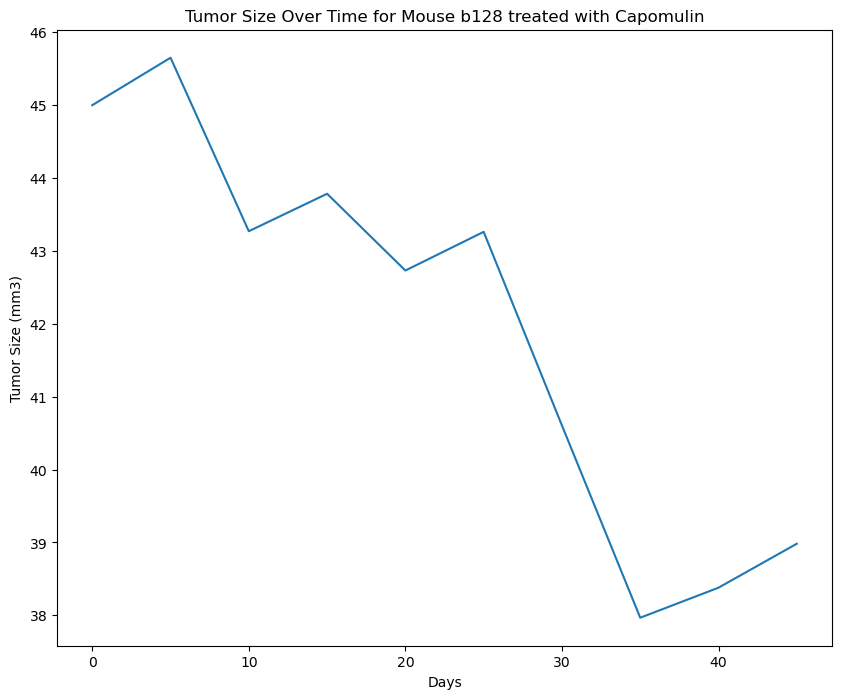

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]
mouse = "b128"
sub_mouse = df2.loc[df2["Mouse ID"] == mouse]
plt.figure(figsize =(10,8))
plt.plot(sub_mouse.Timepoint, sub_mouse["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Size (mm3)")
plt.title(f"Tumor Size Over Time for Mouse {mouse} treated with Capomulin")
plt.show

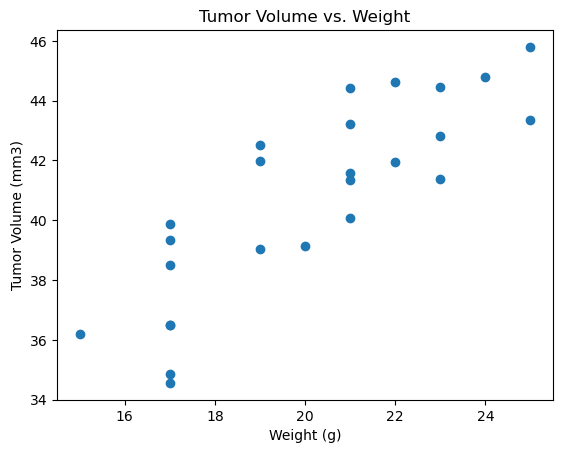

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]
cap_data = cap_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(cap_data["Weight (g)"],cap_data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Weight")
plt.show()

## Correlation and Regression

In [22]:
from scipy.stats import linregress 

Correlation between mouse weight and average tumor volume = 0.84.


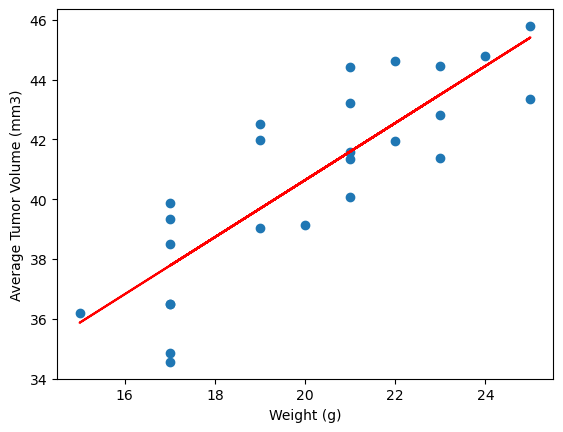

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(cap_data['Weight (g)'],cap_data['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between mouse weight and average tumor volume = {corr}.")
model = st.linregress(cap_data['Weight (g)'],cap_data['Tumor Volume (mm3)'])

y_values = cap_data['Weight (g)']*model[0]+model[1]
plt.scatter(cap_data['Weight (g)'],cap_data['Tumor Volume (mm3)'])
plt.plot(cap_data['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()